# **CUSTOMER ANALYSIS**

**About Dataset**

Customer Personality Analysis involves a thorough examination of a company's optimal customer profiles. This analysis facilitates a deeper understanding of customers, enabling businesses to tailor products to meet the distinct needs, behaviors, and concerns of various customer types.

By conducting a Customer Personality Analysis, businesses can refine their products based on the preferences of specific customer segments. Rather than allocating resources to market a new product to the entire customer database, companies can identify the segments most likely to be interested in the product. Subsequently, targeted marketing efforts can be directed toward those particular segments, optimizing resource utilization and increasing the likelihood of successful product adoption.


Details of Features are as below:

Id: Unique identifier for each individual in the dataset.

Year_Birth: The birth year of the individual.

Education: The highest level of education attained by the individual.

Marital_Status: The marital status of the individual.

Income: The annual income of the individual.

Kidhome: The number of young children in the household.

Teenhome: The number of teenagers in the household.

Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.

Recency: The number of days since the last purchase or interaction.

MntWines: The amount spent on wines.

MntFruits: The amount spent on fruits.

MntMeatProducts: The amount spent on meat products.

MntFishProducts: The amount spent on fish products.

MntSweetProducts: The amount spent on sweet products.

MntGoldProds: The amount spent on gold products.

NumDealsPurchases: The number of purchases made with a discount or as part of a deal.

NumWebPurchases: The number of purchases made through the company's website.

NumCatalogPurchases: The number of purchases made through catalogs.

NumStorePurchases: The number of purchases made in physical stores.

NumWebVisitsMonth: The number of visits to the company's website in a month.

AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.

AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.

AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.

AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.

AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.

Complain: Binary indicator (1 or 0) whether the individual has made a complaint.

Z_CostContact: A constant cost associated with contacting a customer.

Z_Revenue: A constant revenue associated with a successful campaign response.

Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.ticker as mtick


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection  import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Portafolio/PYTHON/Bases/customer_segmentation.csv')
datos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
original = datos.copy()

### **Limpieza y exploración inicial de los datos**

Revisión de la base de datos y conversión / eliminación / imputación de información

*   Datos/registros duplicados
*   Datos con formatos inconsistentes
*   Datos nulos o faltantes
*   Tipo de datos
*   Cantidad de registros
*   Registros unicos
*   Nombres de las columnas
*   Cantidad de columnas


This phase aims to analyze the given information, trying to comprehend further the data, the patterns and the relation between the features. Through this stage its common to know if the data also needs to be cleaned and transformed or be subject of the new variable's creation.

**AVERAGE CUSTOMER PROFILE**

**Understanding the information:**

*   There are 29 features, which indicates a medium dataset with more than 2k registers from the clients and every single register is an unique customer.

*   Income, this feature moves in ranges of 1k and 200k. The customers on average earns per year 51K USD, however, outliers were found such as a salary of 666.666 USD.

*   The homes are divided by two kind of childen: kids and teenagers, which in
total are 2.725, the 53% of the children are represented by teenagers and the remain (47%) by kids.

*   The customers in majority have finished the university, therefore have a bacherlor degree. The highest education reported in the analyzed populations is a PhD degree, being the second education with more frecuency among the customers.

*   The Marital Status "Single" is the status with lowest customers, it only reports 7 clients out of 2.240.

*   The education level most common among the customers is the "Graduate".

*   The customers which are married represent the majority in the postgraduate (14%) and graduate (19%) degrees from all the customers.



**Cleaning and transformed data:**

*   It is necessary to fill the null data in the variable Income, the median was used in the 24 registers which didnt have the information with the purpose of includind this customers into the analysis.

*    The marital status it is divided by 8 categories, and 4 of them such as "Alone", "Absurd" and "YOLO" mean the same that the category "Single", to standarize the meanings the categories named before were replaced by "Single".

*   The feature "Dt_customer" was stored with the wrong type of data, It was an Object Type and throug to_datetime from Pandas the variable was converted to datetime64.

* The level of education was categorized by undergraduate, graduate and postgraduate.





In [ ]:
datos.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
datos.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
datos.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# reemplazar los 24 registros nulos por la mediana de los ingresos de los clientes
# Calcular la mediana de los ingresos
mediana_ingresos = datos['Income'].median()

# Reemplazar los valores nulos por la mediana de los ingresos
datos['Income'] = datos['Income'].fillna(mediana_ingresos)

In [ ]:
# cambiar formato de la variable "Dt_costumer" almacenada como object a formato fecha

# Convertir la columna 'Fecha' a tipo datetime
datos['Dt_Customer'] = pd.to_datetime(datos['Dt_Customer'], format="%d-%m-%Y")

print(datos.dtypes)


ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
# la cantidd de registros obedece a clientes unicos o hay IDs repetidos?
datos["ID"].nunique()

2240

In [ ]:
# Verificar si hay números repetidos en la columna 'id'
hay_repetidos = datos["ID"].duplicated().any()

if hay_repetidos:
    print("Hay números repetidos en la columna 'id'.")
else:
    print("No hay números repetidos en la columna 'id'.")

No hay números repetidos en la columna 'id'.


In [ ]:
# Promedio de ingreso de los clientes
datos['Income'].median()

51381.5

In [ ]:
# Ingreso maximo de los clientes
# Dato max
datos['Income'].max()

666666.0

In [ ]:
# Ingreso minimo
datos['Income'].min()

1730.0

In [ ]:
# cantidad de hijos menores en el hogar
datos["Kidhome"].sum()

995

In [ ]:
# cantidad de hijos adolescentes en el hogar
datos["Teenhome"].sum()

1134

In [ ]:
# Calcular la tabla de frecuencias
tabla_frecuencia = datos['Education'].value_counts().reset_index()
tabla_frecuencia.columns = ['Education', 'Frecuencia']
tabla_frecuencia

,Education,Frecuencia
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


In [ ]:
# Calcular la tabla de frecuencias
tabla_frecuencia = datos['Marital_Status'].value_counts().reset_index()
tabla_frecuencia.columns = ['Marital_status', 'Frecuencia']
tabla_frecuencia

,Marital_status,Frecuencia
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [ ]:
# estandarizar los estados civil disponibles. Unificar "Alone", "Absurd" y "YOLO" como "Single"

datos['Marital_Status']=datos['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO','Alone'], 'Single')


In [ ]:
# estandarizar los niveles de estudio. Agrupar en Basic y 2nd cycle as undergraduate, graduation as graduate, Master/PhD Postgraduate

datos['Education']=datos['Education'].replace(['Basic', '2n Cycle'], 'undergraduate')
datos['Education']=datos['Education'].replace(['Graduation'], 'graduate')
datos['Education']=datos['Education'].replace(['Master', 'PhD'], 'postgraduate')



In [ ]:
datos['Education'].mode()

0    graduate
Name: Education, dtype: object

In [ ]:
# tabla de contingencia entre la educacion y el estado civil

data_crosstab = pd.crosstab(datos['Education'],
                            datos['Marital_Status'],
                               margins = True)
print(data_crosstab)

Marital_Status  Divorced  Married  Single  Together  Widow   All
Education                                                       
graduate             119      433     254       286     35  1127
postgraduate          89      330     178       223     36   856
undergraduate         24      101      55        71      6   257
All                  232      864     487       580     77  2240


In [ ]:
# Calcular la tabla de contingencia con porcentajes
data_crosstab = pd.crosstab(datos['Education'],
                            datos['Marital_Status'],
                            normalize='all',
                            margins=True) * 100

print(data_crosstab)

Marital_Status   Divorced    Married     Single   Together     Widow  \
Education                                                              
graduate         5.312500  19.330357  11.339286  12.767857  1.562500   
postgraduate     3.973214  14.732143   7.946429   9.955357  1.607143   
undergraduate    1.071429   4.508929   2.455357   3.169643  0.267857   
All             10.357143  38.571429  21.741071  25.892857  3.437500   

Marital_Status         All  
Education                   
graduate         50.312500  
postgraduate     38.214286  
undergraduate    11.473214  
All             100.000000  


In [ ]:
# Eliminar variables redundantes para la matriz de correlacion
redundant_features = ['Z_CostContact', 'Z_Revenue']
datos = datos.drop(redundant_features, axis=1)

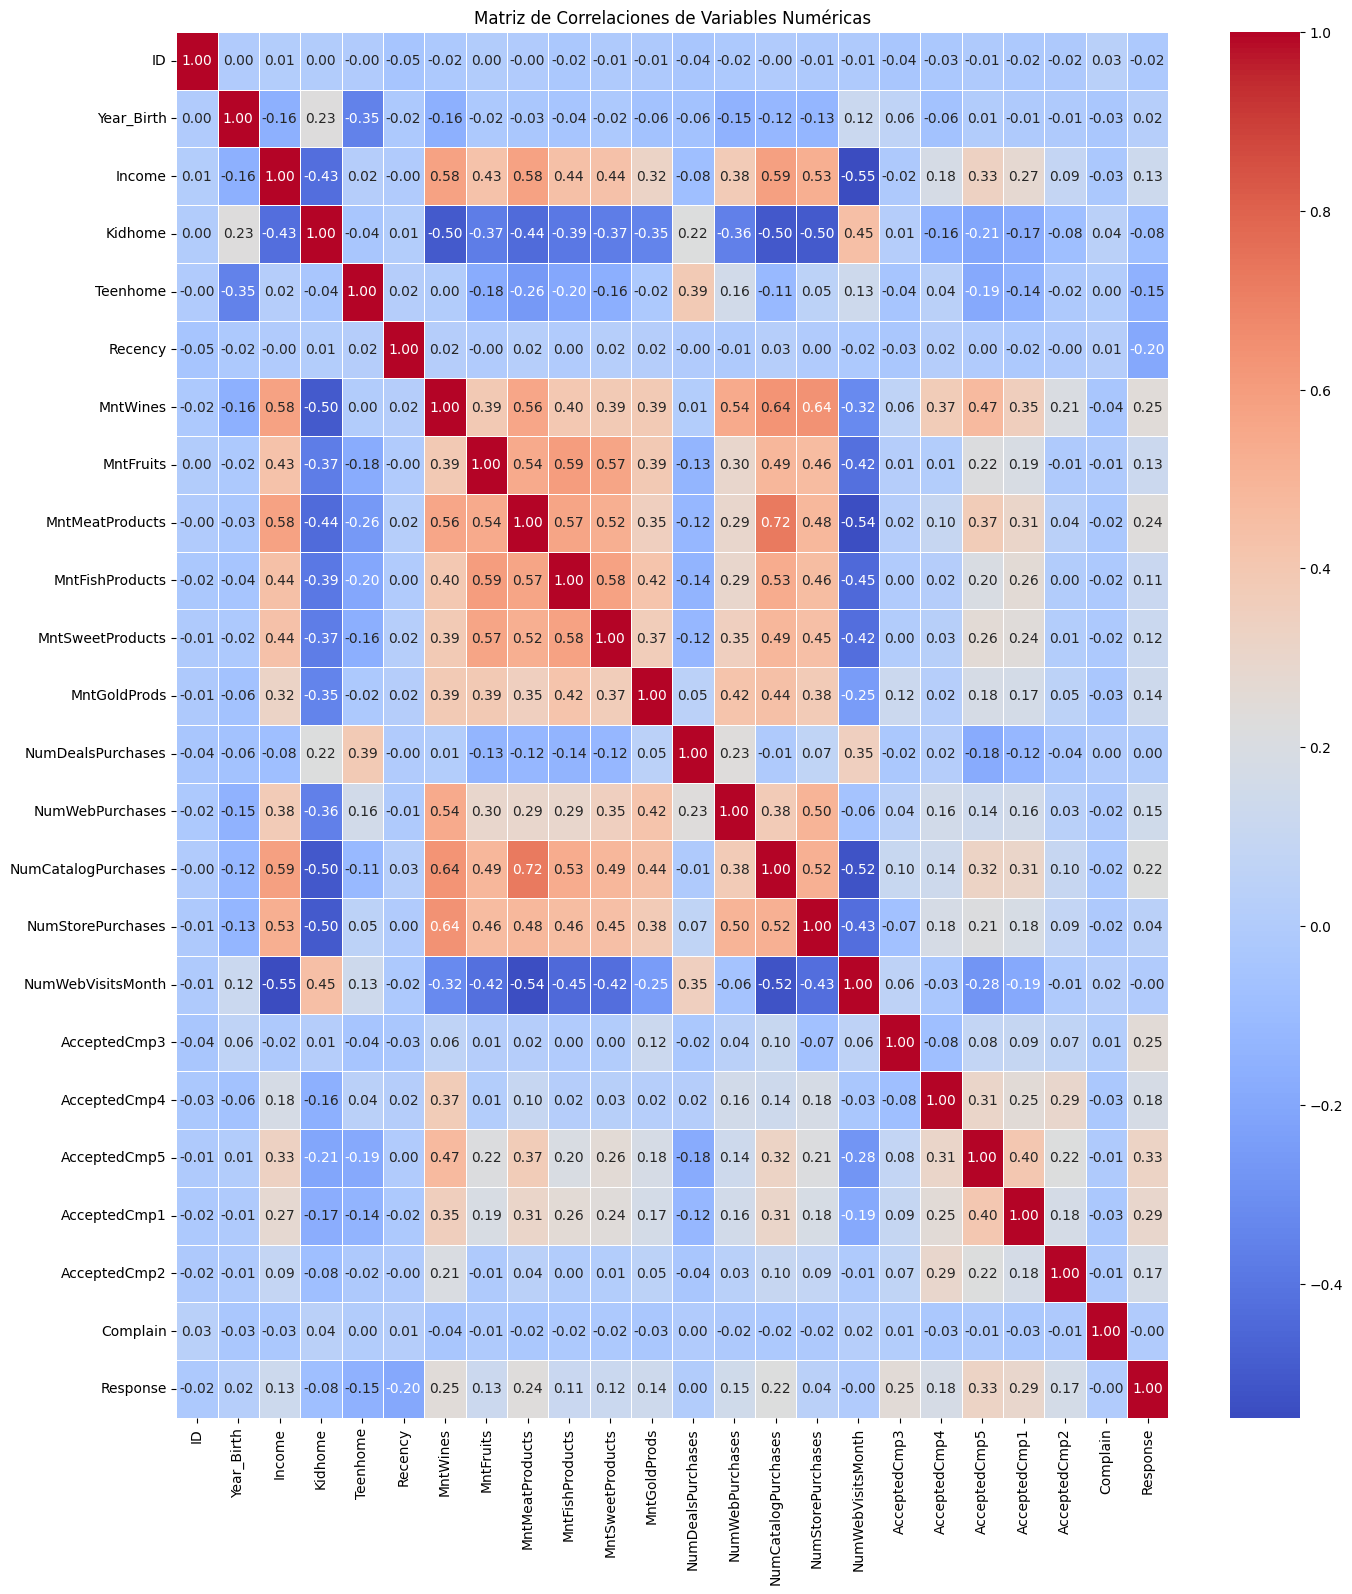

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = datos.select_dtypes(include=[np.number])

# Calcular matriz de correlación
correlation_matrix = numeric_columns.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(16, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones de Variables Numéricas')

# Mostrar el gráfico
plt.show()


correlaciones entre las variables:

*   Existe una relación negativa entre los ingresos y el número de visitas en la páginaweb, indicando que a mayor ingresos las visitas a la web de la empresa disminuyen, esto puede responder al hecho de que los clientes con alto ingreso anual prefieren hacer las compras en fisico o a través del catálogo.

*   Se reporta que a mayor cantidad de hijos menores reportados menos compras via puntos fisicos o catálogos realizan, por otro lado se puede ver que estos clientes son quienes más frecuentan la página web.
Las ventas reportadas con descuentos o algun tipo de beneficio tiene correlación positiva de 0.39 con la cantidad de hijos adolescentes dentro de los hogares.

*   El ingreso vs la suma total de productos de diversas categorias (carnes, pescados, vinos,ect) es directamente proporcional, a mayor ingresos anuales mayor cantidad de este tipo de productos se reportan. Al aumentar el ingreso aumenta en especial las categorias de vino y carnes.
Con relación a las carnes (Meat), y los canales empleados para su compra, se puede generar una hipotesis relacionada al canal preferido por los usuarios para la compra de este producto, teniendo en consideración que esta presente una correlación positiva de 0.72 con las ventas por catálogo.

*   Con respecto a los canales de venta y las ventas por categoria se tienen las siguientes relaciones: Los vinos tienen una presencia fuerte y constante en los 3 canales (tiendas fisicas, pagina web y catálogo), especialmente en catálogo. Para las frutas, pescados, dulces y golds la inclinación esta en orden respectivo de tiendas fisicas y catálogo.

*   Al reportar hijos pequeños (variable Kidhome) se evidencia una relación inversa entre el consumo/compra de productos alcoholicos especificamente en la de vinos (Mntwines), es decir, se espera que si las familias tienen niños y niñas en su núcleo familiar la compra de este tipo de categoria sea reducida.

### **Gráficos**

In [ ]:
datos.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Customer_Age,Total_purchase,Last12m_Purchase,Total_children,Num_personas,Family_members,Education_OneHot
0,5524,1957,graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,67,1617,0,0,1,1,1
1,2174,1954,graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,70,27,1,2,1,3,1
2,4141,1965,graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,59,776,0,0,2,2,1
3,6182,1984,graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,40,53,0,1,2,3,1
4,5324,1981,postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,43,422,0,1,2,3,2


**Distribución de las variables**

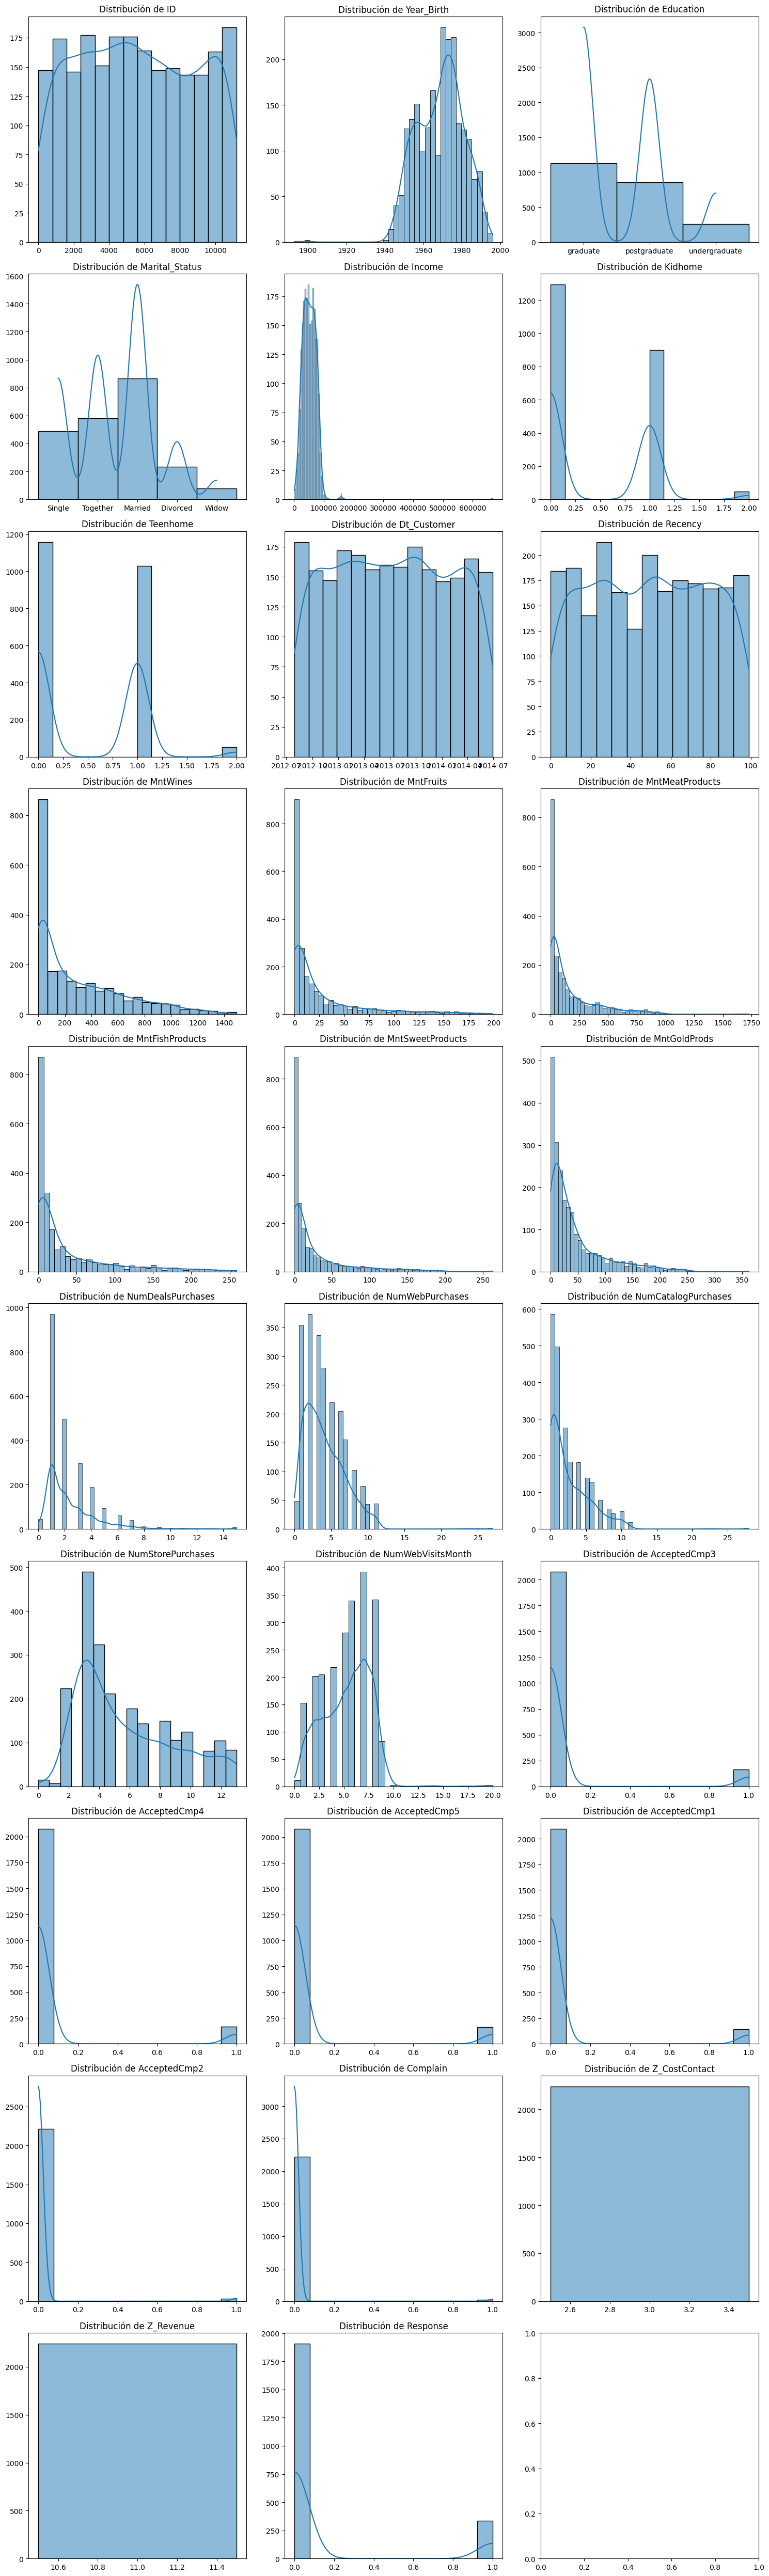

In [ ]:
# distribuciones de las variables cuantitativas del dataset

# Configurar el tamaño de la figura y las subgráficas
num_cols = 3
num_rows = (len(datos.columns) + num_cols - 1) // num_cols
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows*5))

# Graficar las distribuciones de las variables numéricas
for i, col in enumerate(datos.columns):
    sns.histplot(datos
    [col], ax=axs[i // num_cols, i % num_cols], kde=True)
    axs[i // num_cols, i % num_cols].set_title(f'Distribución de {col}')
    axs[i // num_cols, i % num_cols].set_xlabel('')
    axs[i // num_cols, i % num_cols].set_ylabel('')

plt.tight_layout()
plt.show()


**Ingresos por el nivel educativo**

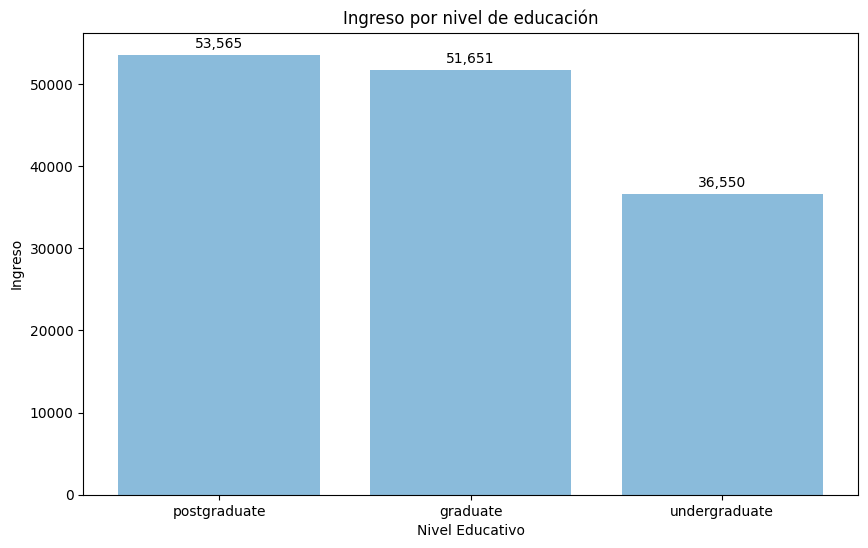

In [ ]:

ventas_por_categoria = datos.groupby('Education')['Income'].median().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Income', ascending=False)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_por_categoria['Education'], ventas_por_categoria['Income'])
sns.set_palette("Blues_d")
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso')
plt.title('Ingreso por nivel de educación')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    height = bar.get_height()
    label = "{:,.0f}".format(height)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

**Ingresos por estado civil**


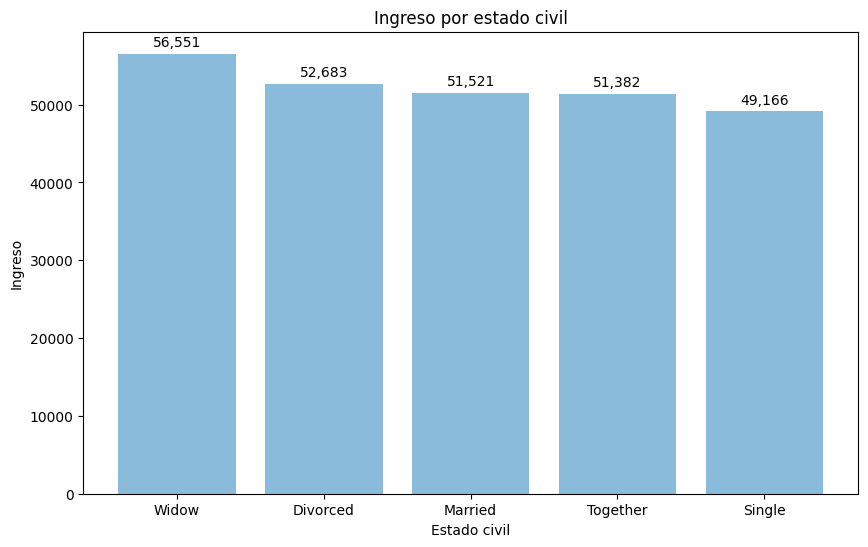

In [ ]:

ventas_por_categoria = datos.groupby('Marital_Status')['Income'].median().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Income', ascending=False)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_por_categoria['Marital_Status'], ventas_por_categoria['Income'])
sns.set_palette("Blues_d")
plt.xlabel('Estado civil')
plt.ylabel('Ingreso')
plt.title('Ingreso por estado civil')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    height = bar.get_height()
    label = "{:,.0f}".format(height)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

**Ingresos por cantidad de hijos**

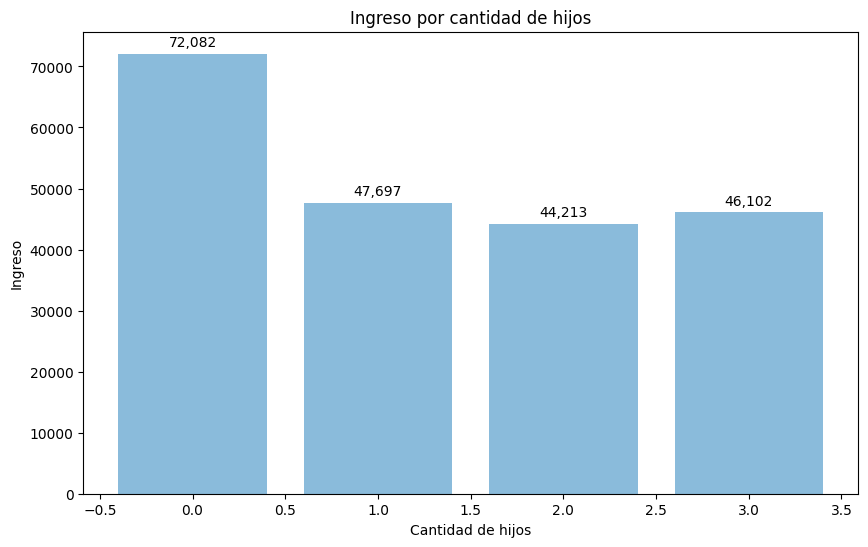

In [ ]:
# Observar el comportamiento de las ventas por categoria
# Agrupa los datos por categoría y suma las ventas
ventas_por_categoria = datos.groupby('Total_children')['Income'].median().reset_index()

# Ordena el DataFrame por ventas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Income', ascending=False)

# Crea un histograma de las ventas por categoría
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_por_categoria['Total_children'], ventas_por_categoria['Income'])
sns.set_palette("Blues_d")
plt.xlabel('Cantidad de hijos')
plt.ylabel('Ingreso')
plt.title('Ingreso por cantidad de hijos')

# Agregar etiquetas de datos con puntos de mil
for bar in bars:
    height = bar.get_height()
    label = "{:,.0f}".format(height)  # Incluye puntos de mil en las etiquetas
    plt.annotate(label, xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

### **Feature Engineering**

**Edad cliente**

In [ ]:
# creación columna "Customer_Age" a partir de le fecha de nacimiento del cliiente - fecha actual

from datetime import datetime

# Calcular la fecha actual
anio_actual = datetime.now().year

# Calcular la edad en años y crear la columna 'Customer_Age'
datos['Customer_Age'] = anio_actual - datos['Year_Birth']

**Monto total comprado ($)**


In [ ]:
# monto total de las categorias de la empresa

datos['Total_purchase'] = datos[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
datos['Total_purchase']


0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_purchase, Length: 2240, dtype: int64

**Compra en los últimos 12 meses**

In [ ]:
datos['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [ ]:
datos['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [ ]:
# la ult fecha registrada es del 06/12/2014, la idea es generar una columna binaria (1 y 0) para aquellos clientes que realizaron compra en los ultimos 12M
# suponiendo que la fecha actual es 27/02/2015

# Calcular la fecha deseada
fecha_seleccionada = datetime.strptime('2015-02-27', '%Y-%m-%d')

# Calcular la diferencia en días entre la fecha seleccionada y la fecha de Dt_Customer
datos['Last12m_Purchase'] = (fecha_seleccionada - datos['Dt_Customer']).dt.days

# Convertir el resultado en 1 si es menor o igual a 365, y en 0 si es mayor a 365
datos['Last12m_Purchase'] = (datos['Last12m_Purchase'] <= 365).astype(int)

**Hijos en total**

In [ ]:
datos['Total_children']=datos['Kidhome']+datos['Teenhome']

**Número de personas por hogar**

In [ ]:
# Crear una nueva columna que indique el número de personas por cada registro
datos['Num_personas'] = datos['Marital_Status'].apply(lambda x: 2 if x in ['Married', 'Together'] else 1)

# suma de la parejas (Married o together y el restante de los estados civiles) más la cantidad de hijos (Ninos y adolescentes)
datos['Family_members']=datos['Num_personas'] + datos['Total_children']



In [ ]:
# Realizar conversión de variable cualitativas a cuantitativas: hot-one encodind solo para "Education"
# Se realiza one hot encoding y no dummy porque hay orden dentro de la variable "Education"

# Definir el diccionario de mapeo
map_dict = {'undergraduate': 0, 'graduate': 1, 'postgraduate': 2}

# Mapear los valores utilizando el diccionario
datos['Education_OneHot'] = datos['Education'].map(map_dict)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## **PCA**


In [ ]:
datos.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_Age',
       'Total_purchase', 'Last12m_Purchase', 'Total_children', 'Num_personas',
       'Family_members', 'Education_OneHot'],
      dtype='object')

In [ ]:
datos_copia = datos.copy()

In [ ]:
datos = datos[['Education_OneHot', 'Family_members', 'Total_children', 'Last12m_Purchase', 'Total_purchase', 'Customer_Age', 'Complain', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
  'NumCatalogPurchases',
 'NumStorePurchases',
  'NumWebVisitsMonth']]

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education_OneHot     2240 non-null   int64
 1   Family_members       2240 non-null   int64
 2   Total_children       2240 non-null   int64
 3   Last12m_Purchase     2240 non-null   int64
 4   Total_purchase       2240 non-null   int64
 5   Customer_Age         2240 non-null   int64
 6   Complain             2240 non-null   int64
 7   Recency              2240 non-null   int64
 8   NumDealsPurchases    2240 non-null   int64
 9   NumWebPurchases      2240 non-null   int64
 10  NumCatalogPurchases  2240 non-null   int64
 11  NumStorePurchases    2240 non-null   int64
 12  NumWebVisitsMonth    2240 non-null   int64
dtypes: int64(13)
memory usage: 227.6 KB


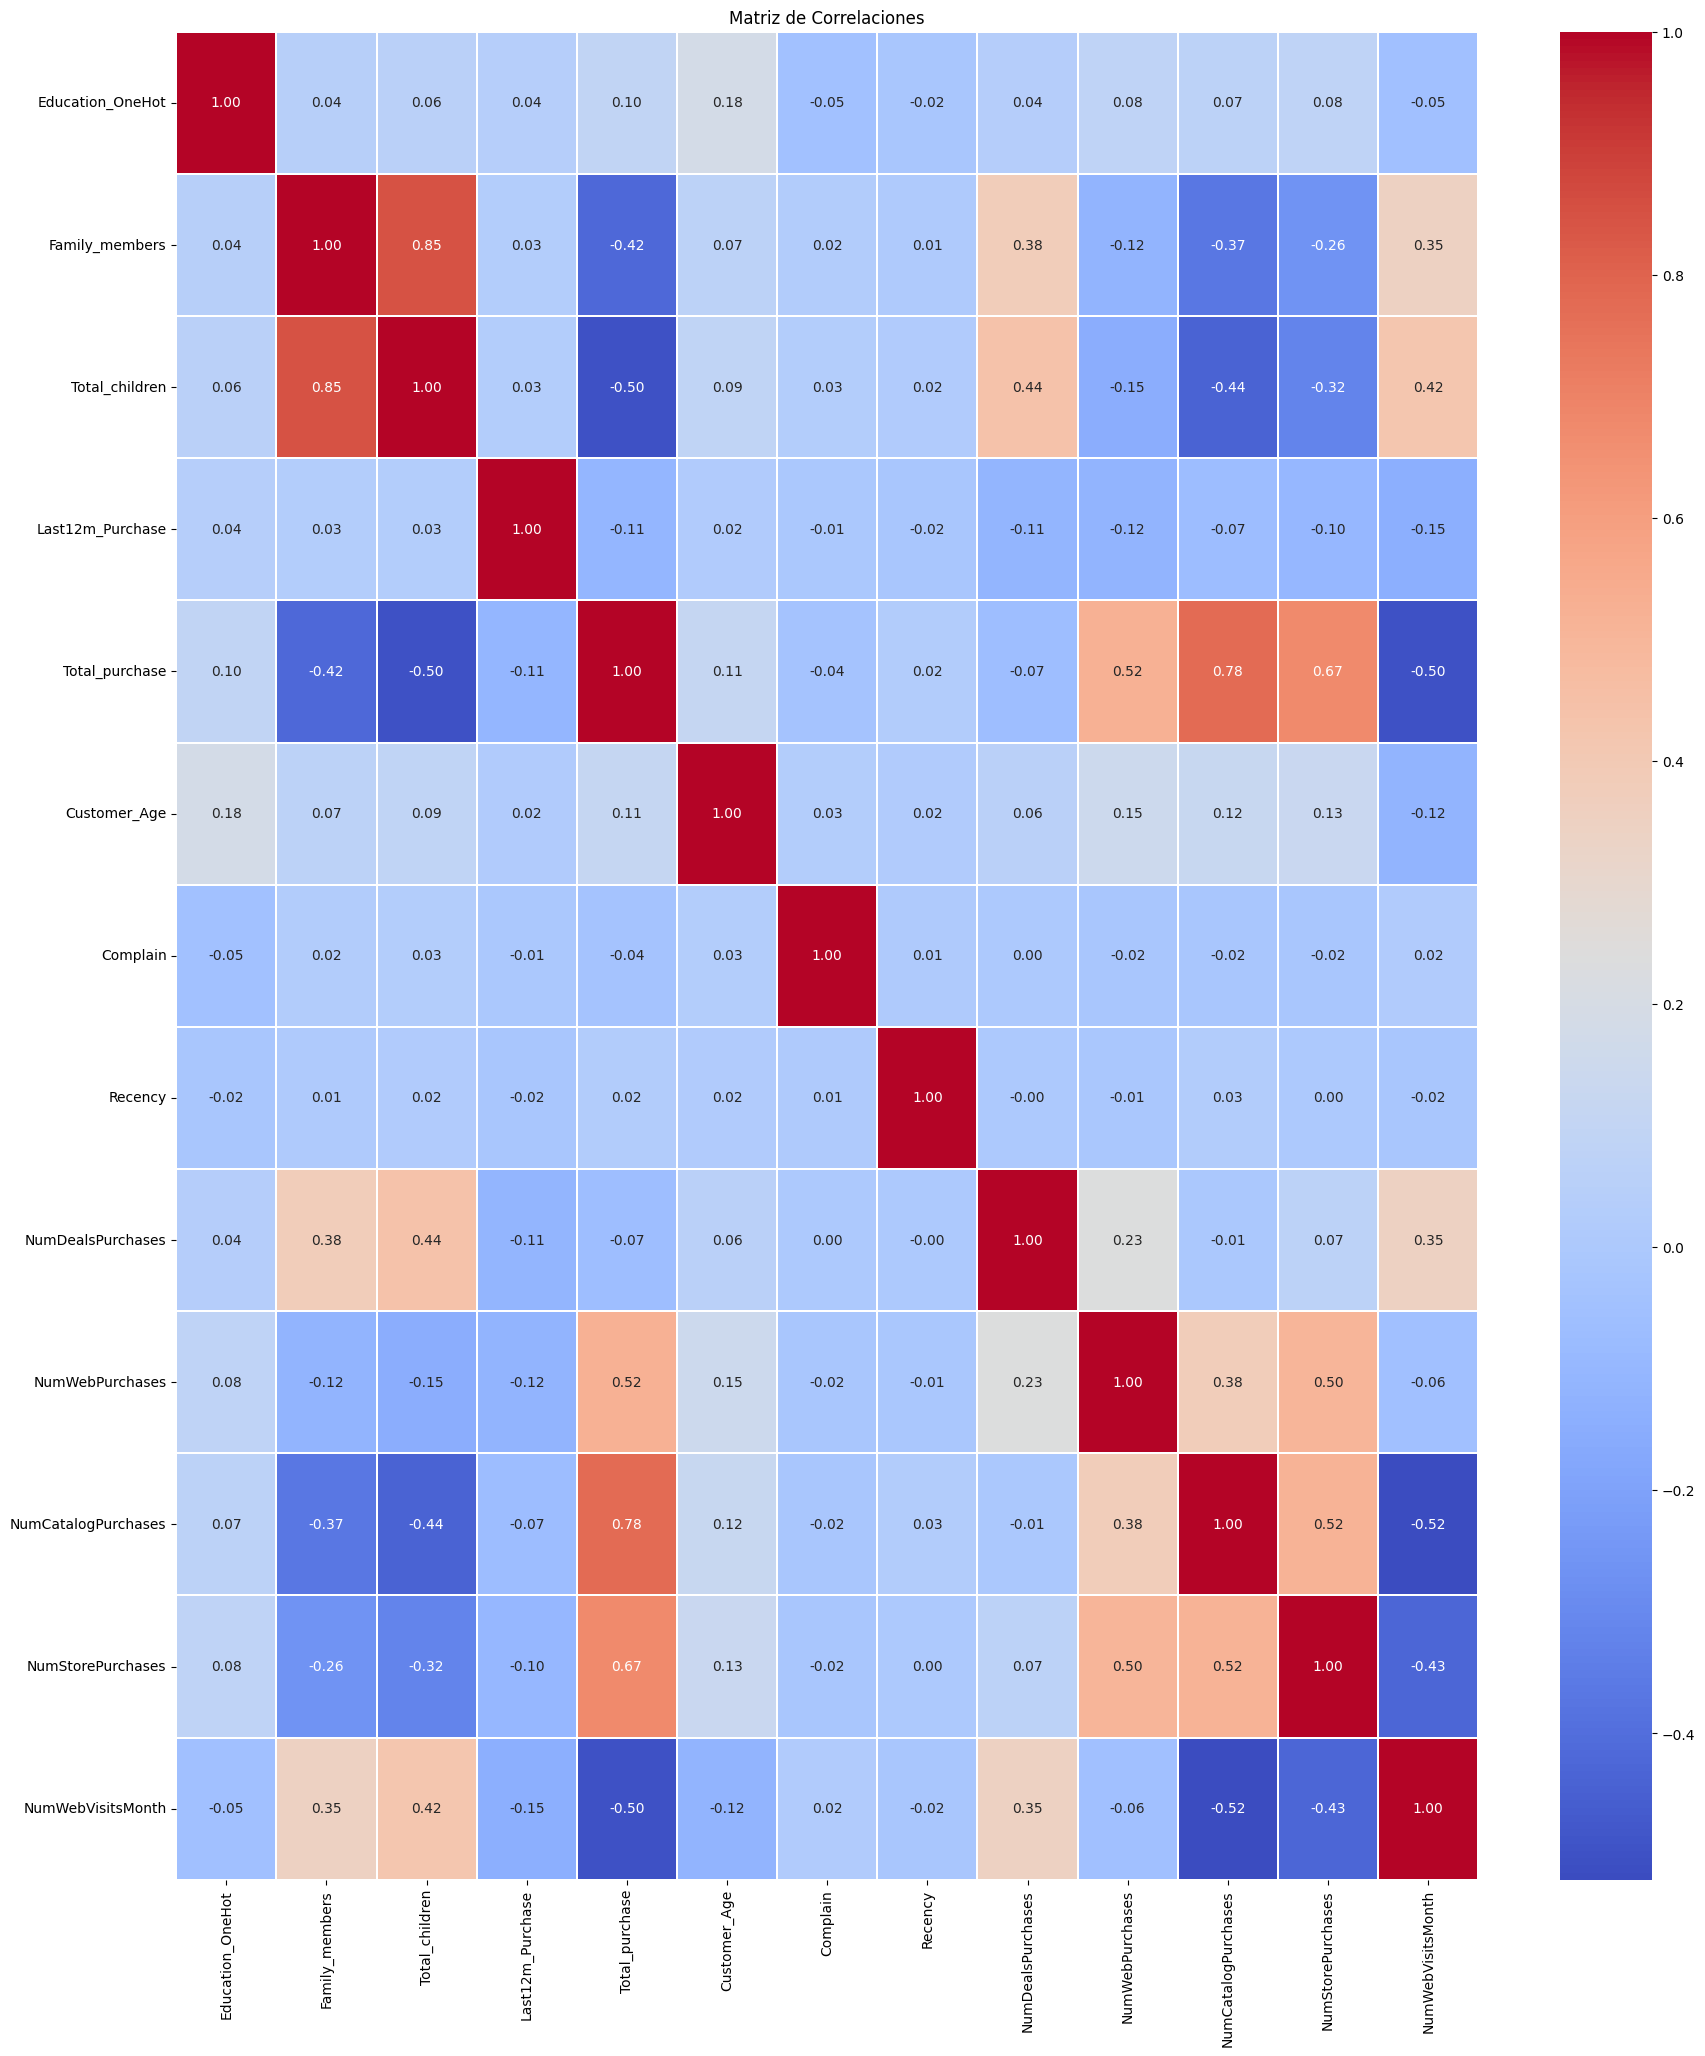

In [ ]:
# matriz de correlación de las variables númericas. Qué features tienen relación negativa o positiva
correlation_matrix = datos.corr()
correlation_matrix

# grafico de la matriz
plt.figure(figsize=(21, 24))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.2)
plt.title('Matriz de Correlaciones')

# Muestra el gráfico
plt.show()

In [ ]:
# reducción de dimension del dataset

from sklearn.decomposition import PCA

pca_clusters = PCA(n_components=2)
principalComponents_cluster = pca_clusters.fit_transform(datos)
principal_Df = pd.DataFrame(data = principalComponents_cluster
             , columns = ['principal component 1', 'principal component 2'])
principal_Df.head()

,principal component 1,principal component 2
0,1011.243066,7.982042
1,-578.791363,-10.389702
2,170.209811,-23.259472
3,-552.865649,-22.685230
4,-183.772854,44.964029


In [ ]:
from sklearn.decomposition import PCA

# Obtener la varianza explicada
varianza_explicada = pca_clusters.explained_variance_ratio_

# Crear un DataFrame para mostrar la varianza explicada
varianza_explicada_df = pd.DataFrame(varianza_explicada, columns=['Varianza Explicada'])
varianza_explicada_df.index = ['Componente Principal 1', 'Componente Principal 2']

# Imprimir el DataFrame
print("Varianza Explicada por Componente Principal:")
print(varianza_explicada_df)

# Imprimir la suma acumulativa de la varianza explicada
print("\nSuma Acumulativa de Varianza Explicada:")
print(varianza_explicada_df.cumsum())


Varianza Explicada por Componente Principal:
                        Varianza Explicada
Componente Principal 1            0.997237
Componente Principal 2            0.002305

Suma Acumulativa de Varianza Explicada:
                        Varianza Explicada
Componente Principal 1            0.997237
Componente Principal 2            0.999543


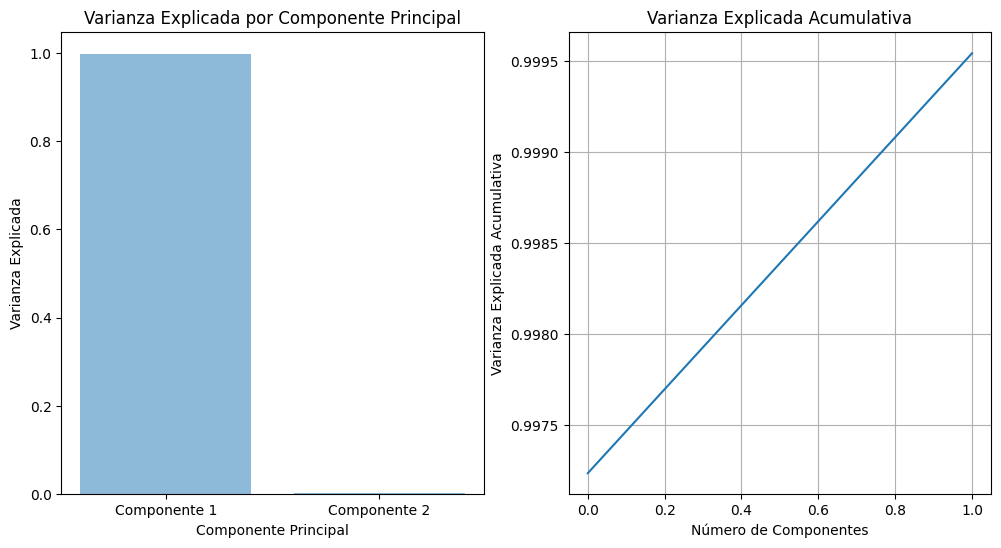

In [ ]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar la varianza explicada por componente
plt.subplot(1, 2, 1)
plt.bar(range(len(varianza_explicada)), varianza_explicada, alpha=0.5, align='center')
plt.ylabel('Varianza Explicada')
plt.xlabel('Componente Principal')
plt.title('Varianza Explicada por Componente Principal')
plt.xticks(range(len(varianza_explicada)), ['Componente 1', 'Componente 2'])

# Graficar la suma acumulativa de la varianza explicada
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(varianza_explicada))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa')
plt.grid(True)
plt.show()

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

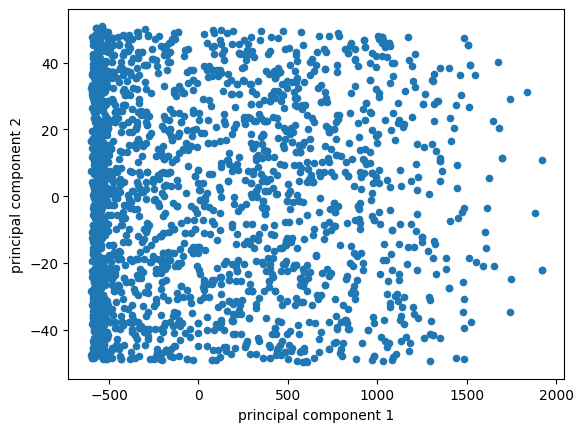

In [ ]:
import matplotlib.pyplot as plt
type(principal_Df)
principal_Df.plot.scatter(x='principal component 1',
                                  y='principal component 2')

## **Modelos No Supervisados de clusterización**

A continuación se presentan 3 modelos de clusterización los cuales serán analizados y posteriormente comparados entre ellos por la métrica del indice de silueta, logrando seleccionar un solo modelo, y posteriormente analizar los comportamientos de consumo y los perfiles de consumidores por segmento.

### Clustering Jerarquico Aglomerativo

In [ ]:
# Cluster Analysis sobre el ACP
from sklearn.cluster import AgglomerativeClustering
from scipy.interpolate import griddata

column_x = ['complete', 'average', 'ward']
column_y = range(2, 11)
print(column_x)
print(column_y)

X = datos

for i in column_y:
    for j in column_x:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage=j)
        labels = hierarchical_cluster.fit_predict(X)
        score = silhouette_score(X, labels, metric='euclidean')
        print("For n_clusters =",i,"and method=",j,"The average silhouette_score is :",score,
             )

['complete', 'average', 'ward']
range(2, 11)
For n_clusters = 2 and method= complete The average silhouette_score is : 0.6039425640923978
For n_clusters = 2 and method= average The average silhouette_score is : 0.6901407354671574
For n_clusters = 2 and method= ward The average silhouette_score is : 0.5894729989734808
For n_clusters = 3 and method= complete The average silhouette_score is : 0.5481241160021186
For n_clusters = 3 and method= average The average silhouette_score is : 0.6299634646140831
For n_clusters = 3 and method= ward The average silhouette_score is : 0.6139370857218127
For n_clusters = 4 and method= complete The average silhouette_score is : 0.6117808333029785
For n_clusters = 4 and method= average The average silhouette_score is : 0.6203518553195871
For n_clusters = 4 and method= ward The average silhouette_score is : 0.6079822607301549
For n_clusters = 5 and method= complete The average silhouette_score is : 0.5904423650571886
For n_clusters = 5 and method= average T

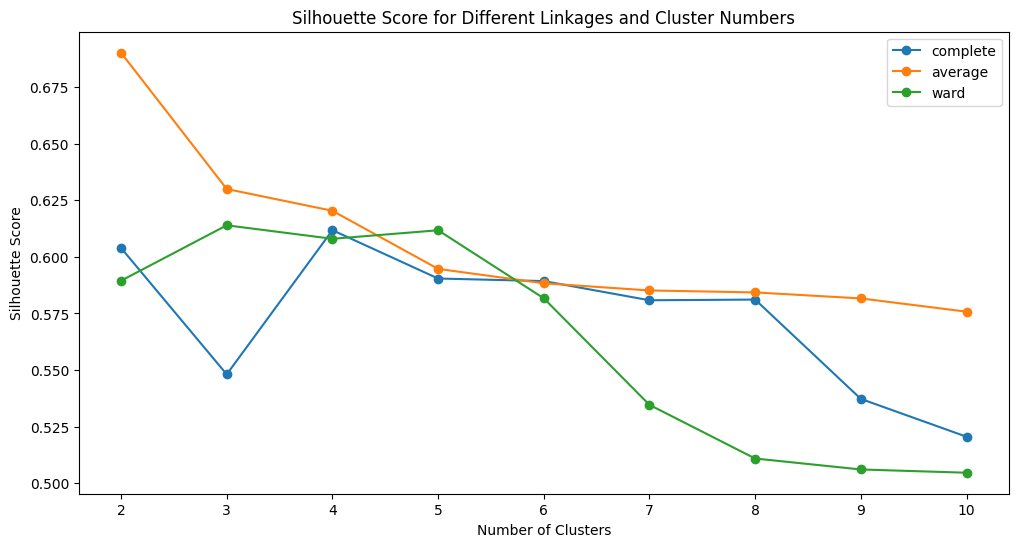

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

column_x = ['complete', 'average', 'ward']
column_y = range(2, 11)

# Crear un DataFrame para almacenar los resultados
results = []

for i in column_y:
    for j in column_x:
        hierarchical_cluster = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage=j)
        labels = hierarchical_cluster.fit_predict(X)
        score = silhouette_score(X, labels, metric='euclidean')
        results.append({'n_clusters': i, 'method': j, 'silhouette_score': score})

# Convertir los resultados a DataFrame para facilitar la manipulación
results_df = pd.DataFrame(results)

# Visualizar los resultados usando un gráfico de barras
plt.figure(figsize=(12, 6))

for method in column_x:
    method_data = results_df[results_df['method'] == method]
    plt.plot(method_data['n_clusters'], method_data['silhouette_score'], label=method, marker='o')

plt.title('Silhouette Score for Different Linkages and Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(X)
score = silhouette_score(X, labels, metric='euclidean')
labels=labels+1
print(labels)

[2 1 4 ... 4 4 1]


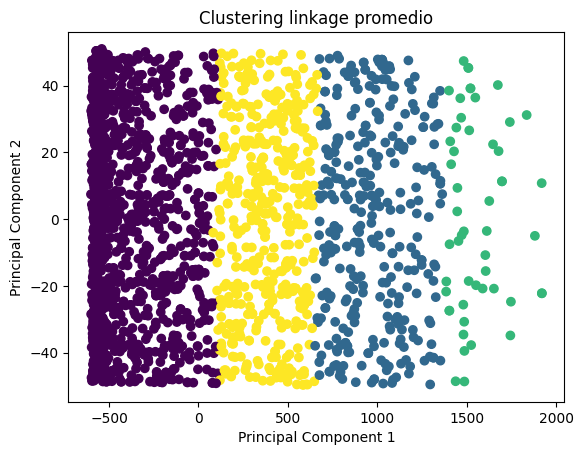

In [ ]:
# Scatter plot con colores según los clusters
plt.scatter(principal_Df['principal component 1'], principal_Df['principal component 2'], c=labels, cmap='viridis')
plt.title('Clustering linkage promedio')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

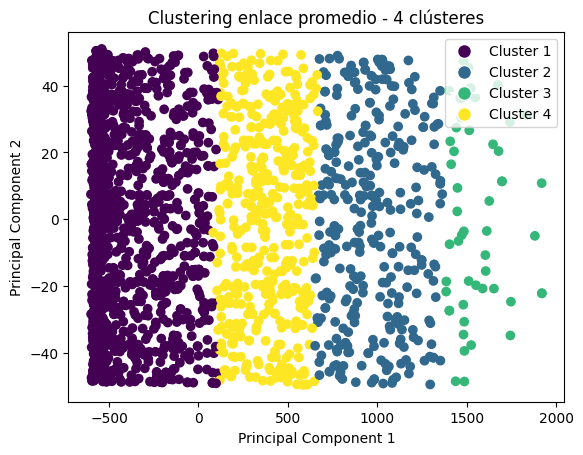

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot con colores según los clusters
scatter = plt.scatter(principal_Df['principal component 1'], principal_Df['principal component 2'], c=labels, cmap='viridis')

# Añadir leyenda
legend_labels = set(labels)  # Obtener etiquetas únicas de los clústeres
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in legend_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in legend_labels], loc='upper right')

plt.title('Clustering enlace promedio - 4 clústeres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
df3 = pd.concat([X,  pd.DataFrame(labels)], axis=1)
#list(df3)
df3.rename({list(df3)[0]: 'PC1', list(df3)[1]: 'PC2', list(df3)[2]: 'Cluster'}, axis=1, inplace=True)
df3.head()

,PC1,PC2,Cluster,Last12m_Purchase,Total_purchase,Customer_Age,Complain,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,0
0,1,1,0,0,1617,67,0,58,3,8,10,4,7,2
1,1,3,2,1,27,70,0,38,2,1,1,2,5,1
2,1,2,0,0,776,59,0,26,1,8,2,10,4,4
3,1,3,1,0,53,40,0,26,2,2,0,4,6,1
4,2,3,1,0,422,43,0,94,5,5,3,6,5,1


In [ ]:
# Agrega las etiquetas predichas al DataFrame original
datos['Cluster'] = labels

# Guarda el DataFrame con las etiquetas en un archivo Excel
datos.to_excel('resultados_clusters_CJA.xlsx', index=False)

In [ ]:
# Agrega las etiquetas predichas al DataFrame original
datos_copia['Cluster_hac'] = labels

### K-medias

In [ ]:
# KMeans calcula el modelo de clusters

from sklearn.cluster import KMeans
#este codigo itera sobre el modelo de k medias, por el número de clusters y valida la inercia de cada resultado
X1 = principal_Df.values
inertia_result = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan'))
    algorithm.fit(X1)
    #en cada iteración va guardando la inercia en la variable inertia_result
    inertia_result.append(algorithm.inertia_)

In [ ]:
#se guardan los hiperparámetros del modelo final.
algorithm = (KMeans(n_clusters = 4,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='full') )
#se entrena el modelo final
algorithm.fit(X1)

#se guardan los labels o etiquetas del modelo
labels1 = algorithm.labels_

#se guardan los centroides del modelo
centroids1 = algorithm.cluster_centers_

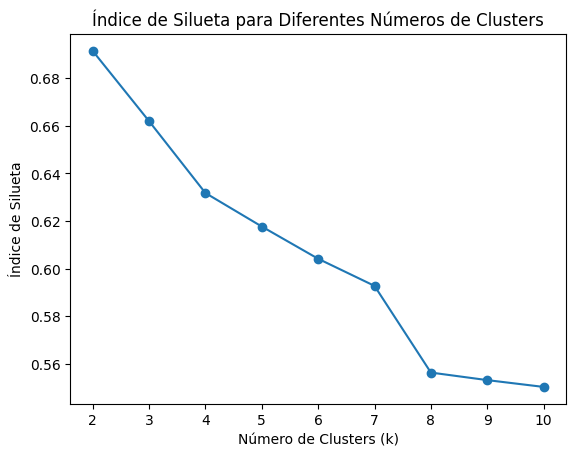

In [ ]:
# Almacena los valores del índice de silueta
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='full')
    labels = model.fit_predict(X1)

    # Calcular el índice de silueta
    silhouette_avg = silhouette_score(X1, labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el índice de silueta
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Índice de Silueta para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silueta')
plt.show()

In [ ]:

# Rango de número de clústeres
n_clusters_range = range(3, 11)

# Lista para almacenar los resultados de los índices de silueta
silhouette_scores = []

for n_clusters in n_clusters_range:
    # Inicializar y ajustar el modelo k-means para el número actual de clústeres
    kmeans = KMeans(n_clusters=n_clusters, random_state=111)
    labels = kmeans.fit_predict(X1)

    # Calcular el índice de silueta
    silhouette_avg = silhouette_score(X1, labels)

    # Agregar el resultado a la lista
    silhouette_scores.append(silhouette_avg)

# Imprimir los resultados
for n_clusters, score in zip(n_clusters_range, silhouette_scores):
    print(f'Silhouette Score para {n_clusters} clústeres:', score)

Silhouette Score para 3 clústeres: 0.6619147263303659
Silhouette Score para 4 clústeres: 0.6317356156552145
Silhouette Score para 5 clústeres: 0.6176554799715349
Silhouette Score para 6 clústeres: 0.6041180661798323
Silhouette Score para 7 clústeres: 0.5927268996713435
Silhouette Score para 8 clústeres: 0.5563205559038493
Silhouette Score para 9 clústeres: 0.5531489434338698
Silhouette Score para 10 clústeres: 0.550290070486003


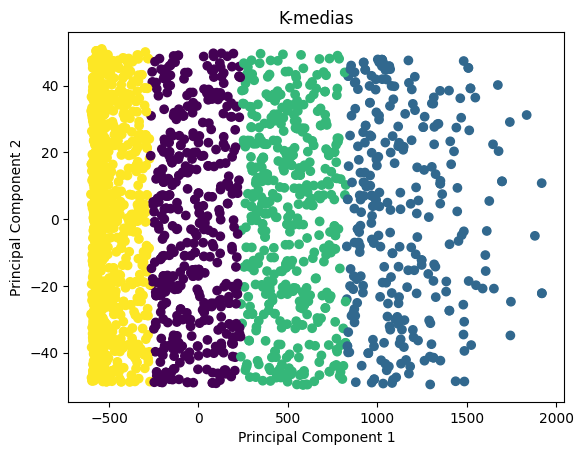

In [ ]:
# Scatter plot con colores según los clusters
plt.scatter(principal_Df['principal component 1'], principal_Df['principal component 2'], c=labels1, cmap='viridis')
plt.title('K-medias')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

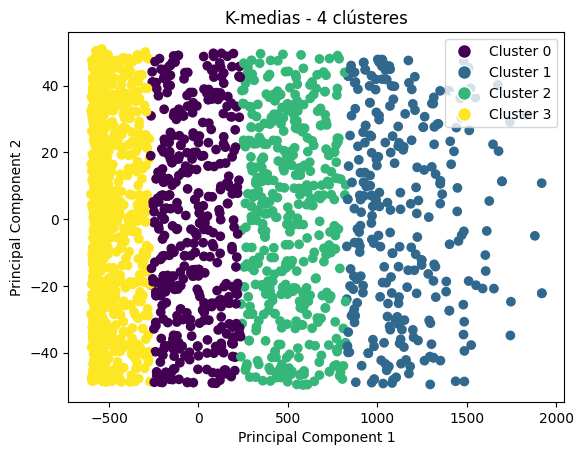

In [ ]:
# Scatter plot con colores según los clusters
scatter = plt.scatter(principal_Df['principal component 1'], principal_Df['principal component 2'], c=labels1, cmap='viridis')

# Añadir leyenda
legend_labels1 = set(labels1)  # Obtener etiquetas únicas de los clústeres
legend_handles1 = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in legend_labels1]
plt.legend(legend_handles1, [f'Cluster {label}' for label in legend_labels1], loc='upper right')

plt.title('K-medias - 4 clústeres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Agrega las etiquetas predichas al DataFrame original
datos['Cluster'] = labels1

# Guarda el DataFrame con las etiquetas en un archivo Excel
datos.to_excel('resultados_clusters_kmeans.xlsx', index=False)

In [ ]:
# Agrega las etiquetas predichas al DataFrame original
datos_copia['Cluster_kmedias'] = labels1

### DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
# The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.

# Inicializar el modelo NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)

# Ajustar el modelo a los datos
nbrs = neigh.fit(principal_Df)

# Calcular las distancias y los índices de los vecinos más cercanos
distances, indices = nbrs.kneighbors(principal_Df)

# Mostrar las distancias y los índices
print("Distancias:")
print(distances)
print("\nÍndices:")
print(indices)


Distancias:
[[0.         4.16676961]
 [0.         1.49788981]
 [0.         2.17749293]
 ...
 [0.         9.81676514]
 [0.         6.33799377]
 [0.         3.95717997]]

Índices:
[[   0   53]
 [   1  907]
 [   2  518]
 ...
 [2237 1058]
 [2238 1567]
 [2239 2080]]


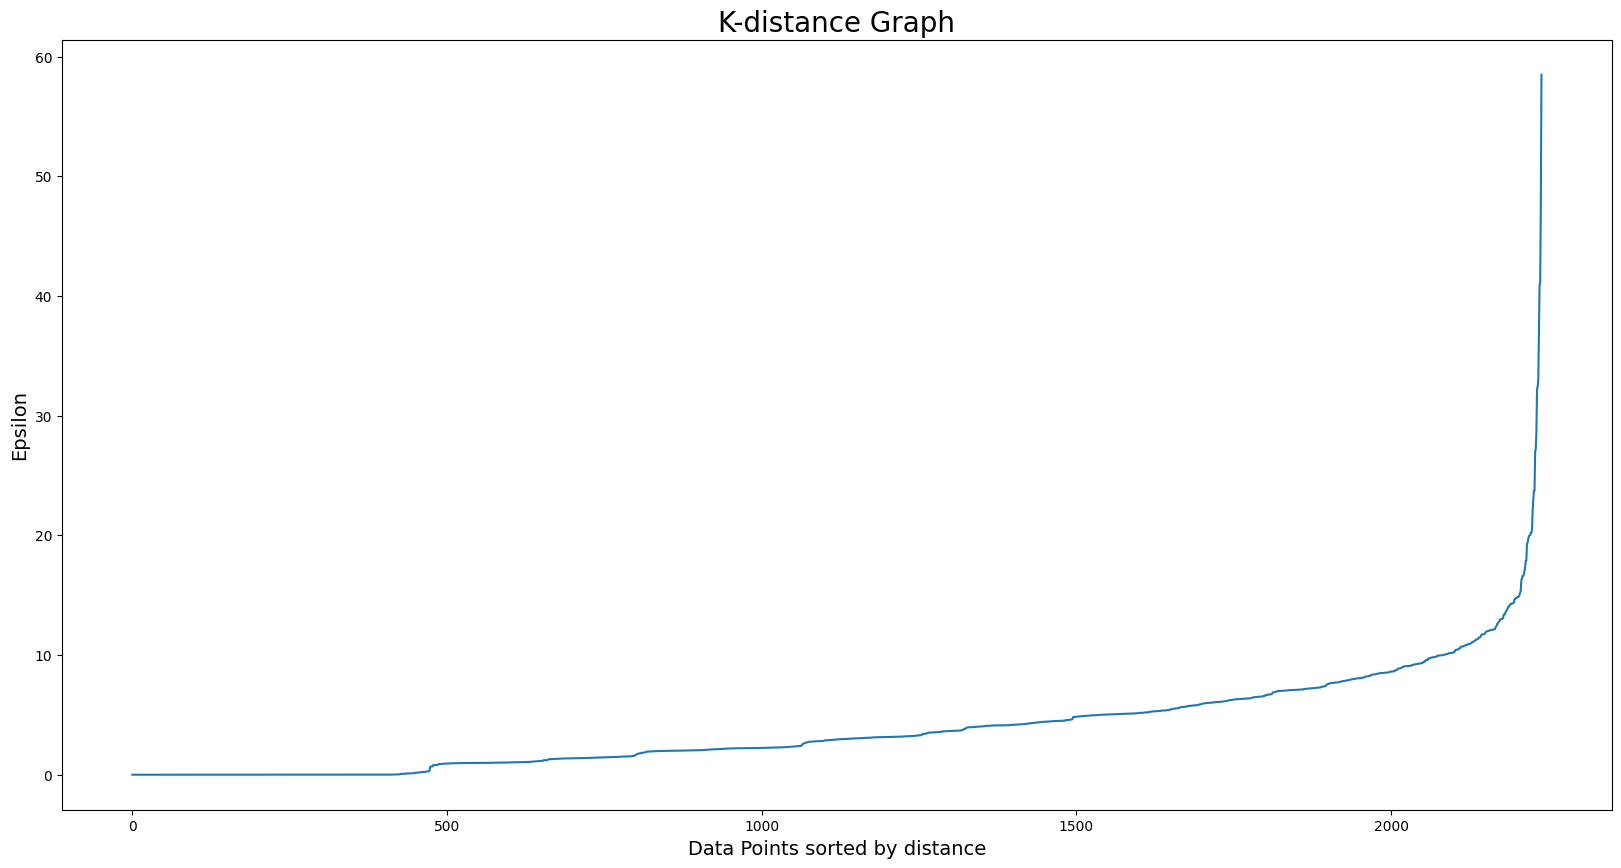

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
dbscan_opt = DBSCAN(eps=25, min_samples=8)
clusters = dbscan_opt.fit_predict(principal_Df[['principal component 1', 'principal component 2']])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Rango de valores para eps y min_samples
eps_range = np.arange(20, 50, 1)
min_samples_range = range(1, 10)

# Lista para almacenar los resultados de los índices de silueta
silhouette_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        # Inicializar y ajustar el modelo DBSCAN para los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels2 = dbscan.fit_predict(principal_Df[['principal component 1', 'principal component 2']])

        # Calcular el índice de silueta
        silhouette_avg = silhouette_score(principal_Df[['principal component 1', 'principal component 2']], labels2)

        # Agregar el resultado a la lista
        silhouette_scores.append((eps, min_samples, silhouette_avg))

# Imprimir los resultados
for eps, min_samples, score in silhouette_scores:
    print(f'Silhouette Score para eps={eps}, min_samples={min_samples}:', score)


Silhouette Score para eps=20, min_samples=1: 0.32091445454821926
Silhouette Score para eps=20, min_samples=2: 0.36213168080151725
Silhouette Score para eps=20, min_samples=3: 0.3639913168906377
Silhouette Score para eps=20, min_samples=4: 0.384829004601066
Silhouette Score para eps=20, min_samples=5: 0.3739395422587024
Silhouette Score para eps=20, min_samples=6: 0.2757675544155534
Silhouette Score para eps=20, min_samples=7: 0.29807475444403725
Silhouette Score para eps=20, min_samples=8: 0.4352787114360131
Silhouette Score para eps=20, min_samples=9: 0.2961685075978953
Silhouette Score para eps=21, min_samples=1: 0.36889111094527743
Silhouette Score para eps=21, min_samples=2: 0.3779040963925561
Silhouette Score para eps=21, min_samples=3: 0.37484213034694797
Silhouette Score para eps=21, min_samples=4: 0.3810808279927634
Silhouette Score para eps=21, min_samples=5: 0.3795348198944602
Silhouette Score para eps=21, min_samples=6: 0.3782884087659271
Silhouette Score para eps=21, min_sa

In [ ]:
# Asignar las etiquetas optimizadas por DBSCAN al DataFrame
principal_Df['DBSCAN_opt_labels'] = clusters

# Contar el número de puntos en cada cluster
principal_Df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    2117
-1      83
 3      14
 2      14
 1      12
Name: count, dtype: int64

In [ ]:
#principal_Df['DBSCAN_opt_labels']=dbscan_opt.labels2
#principal_Df['DBSCAN_opt_labels'].value_counts()

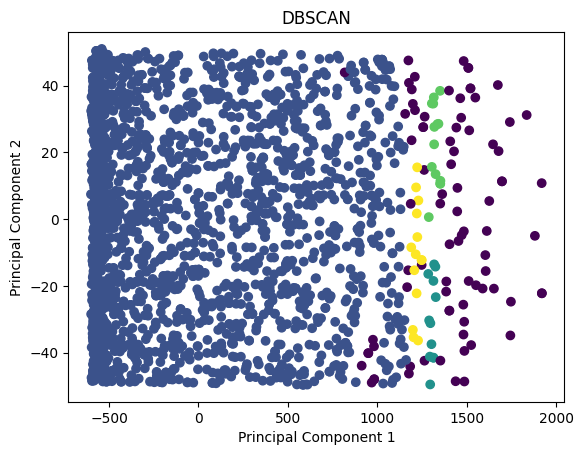

In [ ]:
plt.scatter(principal_Df['principal component 1'], principal_Df['principal component 2'], c=principal_Df['DBSCAN_opt_labels'], cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **Perfil de consumidor y comportamientos de consumo por clúster**

Considerando los 4 modelos y su respectiva métrica de comparación (índice de silueta - IS), se obtienen los siguientes resultados:

1.   Jerarquico Aglomerativo: Linkage promedio IS = 0.620
2.   K-medias:IS = 0.631
3.   DBSCAN: epsilon 25 Minsample 8 IS = 0.401

De acuerdo a lo anterior, se puede concluir que los modelos que mejor se ajustan a los datos y a la naturaleza del proyecto son el clustering jerarquico aglomerativo y el k-medias, estableciendo así que estos dos tipos de modelos no supervisados son los más óptimos para la clasificación y considerando el índice de silueta el cual muestra que no hay una diferencia significativa entre estos dos ese busca otra métrica que permita analizar la calidad de la segmentación.
Para esto se elige el Índice Davies-Bouldin (Un valor más bajo indica una mejor separación entre los clusters), a continuacón se presenta el comarativo enter los dos modelos preselleconados.


In [ ]:
db_kmeans = davies_bouldin_score(X1, labels1)
print(f'Índice Davies-Bouldin para k-medias: {db_kmeans}')

Índice Davies-Bouldin para k-medias: 0.5089988677412768


In [ ]:
db_agg = davies_bouldin_score(X, labels)
print(f'Índice Davies-Bouldin para jerárquico aglomerativo: {db_agg}')

Índice Davies-Bouldin para jerárquico aglomerativo: 0.5894569758275597


Considerando el índice de silueta y el Davies-Bouldin **se define que el mejor modelo es el cluster K-medias**, a continuación se presenta el análisis de los clústeres y del tipo de consumidor por cluster

### **Consumidor promedio por tipo de clúster**

De acuerdo al modelo de clusterizacións se establecen 4 clústeres, a continuación se realiza un análisis del consumidor por tipo de segmento generado:

*   **CLÚSTER N0:** 429 clientes

Representa el 19.15% del total de los clientes de la empresa. Caracterizados por tener una edad promedio de 56 años, con un ingreso anual  promedio de $ 56.337 USD, con titulo universitario y posgrados (masters, PhD) y estar estar casados, en unión libre o solteros con media de un único (1) hijo y en menor proporción 2 hijos.

Son los 3ros con mayor reporte en compras, con un valor promedio de $ 562 USD y frecuencia de compra alrededor de 46 días. El orden de los canales de compra son tienda física, página web y catálogo; los productos más comprados en este clúster son: vinos, carnes, orfebreria, pescados, dulces y frutas.


*   **CLÚSTER N1:** 285 clientes

Este segmento representa el 12.73% del total de los clientes registrados. Caracterizados por ser usuarios de 54 años, con un ingreso anual promedio de $ 78.618 USD siendo el clúster con aquellos clientes con mayor reporte de ingresos, con titulo universitario y posgrados (masters, PhD) y estar casados, en unión libre o solteros sin hijos.

Este tipo de clientes es quien más compras (ventas USD) reporta, con un promedio alrededor de $ 1.690 USD, además son los clientes que mayor tiempo llevan vinculados a la compania, estando desde abril del 2013. Tienen una frecuencia de compra de 53 días / 100 días, la tendencia del canal de compra se enfoca respectivamente en tienda física y catálogo, y aquellos productos de mayor consumo son: vinos, carnes, pescados, orfebreria, dulces y frutas.


*   **CLÚSTER N2:** 453 clientes

Este segmento representa el 20.22% del total de los clientes registrados.  Caracterizados por ser usuarios de 59 años, con un ingreso anual promedio de $ 69.476 USD, con titulo universitario y posgrados (masters, PhD) y estar casados, en unión libre o solteros algunos sin hijos y otros con media de un único (1) hijo.

Junto con los clientes del clúster N1, son quienes más reportes de compras tienen con un valor promedio de $ 1.102 USD. Su frecuencia promedio de compra es de 53 días / 100 días y el canal de compra preferido por este tipo de consumidores es: tienda física y página web. Las categorías de productos más compradas son: vinos, carnes, orfebreria, pescados, dulces y frutas.


*   **CLÚSTER N3:** 1073 clientes

Este segmento es quien mayor porcentaje de participación tiene total empresa, representando el 47.90%. Caracterizados por tener una edad promedio de 52 años, con un ingreso anual  promedio de $ 35.322 USD, con estudios principalmente en pregrado y posgrados (masters, PhD) y estar estar casados, en unión libre o solteros con media de un único (1) hijo y en menor proporción 2 hijos.

Este tipo de cliente es quien menos reporte de ventas genera en la empresa, con una media de $ 66 USD y su frecuencia de compra esta en 49 días. El canal de compra preferido es la tienda física seguido por página web y catálogo, y sus productos más comprados son: vinos, carnes, orfebreria, pescados, dulces y frutas.


### **Análisis General**

*   Se puede concluir que los segmentos se dividen particularmente por el nivel de consumo de los productos y los ingresos, logrando dividirse en clientes con ingresos superiores, medio-alto, medio y bajos, por ende sus compras se ven significativamente afectadas, a mayor ingreso mayor capacidad de compra.

*   La categoría de productos con mayores ventas son los vinos y las carnes.

*   El rango de edad de los clientes es de 50-60 años casados/unión libre con alrededor de 1 a 2 hijos.

*   El nivel educativo más frecuente dentro de los clientes es pregrado y posgrado.

*   Las personas con estado civil viud@ son aquellas que en promedio reportan mayores ingresos.

*   Los periodos de frecuencia de compra siguen una distribución uniforme, lo que indica que la probabilidad de que un cliente realice una compra dentro de un intervalo de tiempo (días) específico es constante e igual para todos los intervalos de tiempo dentro de un rango dado.

*   Se podría establecer que el perfil promedio de los clientes de esta empresa minorista es como el clúster N3, siendo alrededor de la mitad de los clientes totales registrados y representando de forma generalizada las tendencias de consumo.


In [ ]:
datos_copia

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Customer_Age,Total_purchase,Last12m_Purchase,Total_children,Num_personas,Family_members,Education_OneHot,Cluster_hac,Cluster_kmedias
0,5524,1957,graduate,Single,58138.0,0,0,2012-09-04,58,635,...,1,67,1617,0,0,1,1,1,2,1
1,2174,1954,graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,70,27,1,2,1,3,1,1,3
2,4141,1965,graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,59,776,0,0,2,2,1,4,0
3,6182,1984,graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,40,53,0,1,2,3,1,1,3
4,5324,1981,postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,43,422,0,1,2,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,57,1341,0,1,2,3,1,2,2
2236,4001,1946,postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,0,78,444,1,3,2,5,2,1,0
2237,7270,1981,graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,43,1241,0,0,1,1,1,4,2
2238,8235,1956,postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,68,843,0,1,2,3,2,4,2


In [ ]:
datos_copia.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_Age',
       'Total_purchase', 'Last12m_Purchase', 'Total_children', 'Num_personas',
       'Family_members', 'Education_OneHot', 'Cluster_hac', 'Cluster_kmedias'],
      dtype='object')

In [ ]:
# canales de compra de los clientes
variables = ['Cluster_kmedias', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Crear la tabla dinámica
tabla_pivot = pd.pivot_table(datos_copia, values=variables[1:], index='Cluster_kmedias', aggfunc='sum', fill_value=0)

# Mostrar la tabla dinámica
print(tabla_pivot)

                 NumCatalogPurchases  NumDealsPurchases  NumStorePurchases  \
Cluster_kmedias                                                              
0                               1188               1481               3119   
1                               1830                437               2317   
2                               2342               1026               4016   
3                                603               2264               3518   

                 NumWebPurchases  NumWebVisitsMonth  
Cluster_kmedias                                      
0                           2661               2327  
1                           1548                951  
2                           2611               1774  
3                           2330               6857  


In [ ]:
# categoria de productos de los clientes
variables = ['Cluster_kmedias','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

# Crear la tabla dinámica
tabla_pivot = pd.pivot_table(datos_copia, values=variables[1:], index='Cluster_kmedias', aggfunc='sum', fill_value=0)

# Mostrar la tabla dinámica
print(tabla_pivot)

                 MntFishProducts  MntFruits  MntGoldProds  MntMeatProducts  \
Cluster_kmedias                                                              
0                          14932      10483         25793            50724   
1                          27625      19522         22482           163495   
2                          33890      23588         34815           134703   
3                           7610       5324         15519            25046   

                 MntSweetProducts  MntWines  
Cluster_kmedias                              
0                           10590    133205  
1                           19784    246865  
2                           24523    252199  
3                            5724     48547  


In [ ]:
# ingreso medio de los clientes por nivel de educacion y estado civil
ventas_por_categoria_genero = datos.groupby(['Education', 'Marital_Status'])['Income'].median().reset_index()
ventas_por_categoria_genero = ventas_por_categoria_genero.sort_values(by='Income', ascending=False)
ventas_por_categoria_genero

,Education,Marital_Status,Income
4,graduate,Widow,58275.0
9,postgraduate,Widow,56551.0
0,graduate,Divorced,55635.0
6,postgraduate,Married,55318.0
3,graduate,Together,53977.0
8,postgraduate,Together,52190.0
1,graduate,Married,51267.0
2,graduate,Single,50724.5
5,postgraduate,Divorced,50611.0
7,postgraduate,Single,49840.5


In [ ]:
# frecuencia de compra promedio por cluster
datos_copia.groupby('Cluster_kmedias')['Recency'].median()

Cluster_kmedias
0    46.0
1    53.0
2    53.0
3    49.0
Name: Recency, dtype: float64

In [ ]:
# tempo promedio desde que ingreso a la empresa por cluster
datos_copia.groupby('Cluster_kmedias')['Dt_Customer'].median()

Cluster_kmedias
0   2013-06-24
1   2013-04-22
2   2013-05-17
3   2013-08-22
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
# promedio total comprado por cluster
datos_copia.groupby('Cluster_kmedias')['Total_purchase'].median()

Cluster_kmedias
0     562.0
1    1690.0
2    1102.0
3      66.0
Name: Total_purchase, dtype: float64

In [ ]:
# edad promedio por cluster
datos_copia.groupby('Cluster_kmedias')['Customer_Age'].median()

Cluster_kmedias
0    56.0
1    54.0
2    59.0
3    52.0
Name: Customer_Age, dtype: float64

In [ ]:
# ngreso promedio por cluster
datos_copia.groupby('Cluster_kmedias')['Income'].median()

Cluster_kmedias
0    56337.0
1    78618.0
2    69476.0
3    35322.0
Name: Income, dtype: float64

In [ ]:
# cantidad de clientes por cada cluster
datos_copia['Cluster_kmedias'].value_counts()

Cluster_kmedias
3    1073
2     453
0     429
1     285
Name: count, dtype: int64

In [ ]:
data_crosstab = pd.crosstab(datos_copia['Education'],
                            datos_copia['Cluster_kmedias'],
                            normalize='all',
                            margins=True) * 100

print(data_crosstab)

Cluster_kmedias          0          1          2          3         All
Education                                                              
graduate          9.553571   6.562500  10.714286  23.482143   50.312500
postgraduate      7.857143   5.625000   7.678571  17.053571   38.214286
undergraduate     1.741071   0.535714   1.830357   7.366071   11.473214
All              19.151786  12.723214  20.223214  47.901786  100.000000


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

tabla_frecuencia = datos_copia.groupby(['Cluster_kmedias','Marital_Status'])['Total_children'].value_counts().reset_index(name='Frecuencia')
tabla_frecuencia = tabla_frecuencia.sort_values(by=['Cluster_kmedias', 'Marital_Status','Total_children']).reset_index(drop=True)
tabla_frecuencia

,Cluster_kmedias,Marital_Status,Total_children,Frecuencia
0,0,Divorced,0,7
1,0,Divorced,1,29
2,0,Divorced,2,4
3,0,Married,0,23
4,0,Married,1,107
5,0,Married,2,35
6,0,Married,3,4
7,0,Single,0,23
8,0,Single,1,55
9,0,Single,2,13


In [ ]:
# Crear una tabla dinámica con los datos de tabla_frecuencia
tabla_pivot = tabla_frecuencia.pivot(index='Cluster_kmedias', columns='Recency', values='Frecuencia')

# Mostrar la tabla dinámica
print(tabla_pivot)


Recency            0     1     2     3     4    5     6    7     8     9   \
Cluster_kmedias                                                             
0                 9.0   5.0   4.0   8.0   7.0  NaN   2.0  1.0   6.0   6.0   
1                 NaN   5.0   5.0   1.0   1.0  1.0   3.0  2.0   4.0   3.0   
2                 5.0   4.0   5.0  10.0   9.0  5.0   6.0  2.0   5.0   2.0   
3                14.0  10.0  14.0  10.0  10.0  9.0  10.0  7.0  10.0  13.0   

Recency            10    11   12    13   14    15    16   17   18    19    20  \
Cluster_kmedias                                                                 
0                 4.0   8.0  5.0   3.0  6.0   2.0   2.0  5.0  7.0   6.0   2.0   
1                 4.0   1.0  4.0   4.0  3.0   1.0   3.0  3.0  1.0   3.0   4.0   
2                 3.0   2.0  6.0   5.0  1.0   NaN   1.0  5.0  4.0   5.0   2.0   
3                15.0  15.0  9.0  15.0  9.0  13.0  15.0  7.0  7.0  11.0  13.0   

Recency           21   22    23    24    25    26 

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

tabla_frecuencia = datos_copia.groupby('Cluster_kmedias')['Recency'].value_counts().reset_index(name='Frecuencia')
tabla_frecuencia = tabla_frecuencia.sort_values(by=['Cluster_kmedias','Recency']).reset_index(drop=True)
tabla_frecuencia

,Cluster_kmedias,Recency,Frecuencia
0,0,0,9
1,0,1,5
2,0,2,4
3,0,3,8
4,0,4,7
5,0,6,2
6,0,7,1
7,0,8,6
8,0,9,6
9,0,10,4


In [ ]:
# cantidad de clientes por nivel educativo
datos_copia.groupby('Cluster_kmedias')['Education'].value_counts()

Cluster_kmedias  Education    
0                graduate         214
                 postgraduate     176
                 undergraduate     39
1                graduate         147
                 postgraduate     126
                 undergraduate     12
2                graduate         240
                 postgraduate     172
                 undergraduate     41
3                graduate         526
                 postgraduate     382
                 undergraduate    165
Name: count, dtype: int64

In [ ]:
# cantidad de clientes por estado civil
datos_copia.groupby('Cluster_kmedias')['Marital_Status'].value_counts()

Cluster_kmedias  Marital_Status
0                Married           169
                 Together          111
                 Single             93
                 Divorced           40
                 Widow              16
1                Married           102
                 Together           77
                 Single             67
                 Divorced           27
                 Widow              12
2                Married           178
                 Together          110
                 Single             88
                 Divorced           55
                 Widow              22
3                Married           415
                 Together          282
                 Single            239
                 Divorced          110
                 Widow              27
Name: count, dtype: int64